In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

In [7]:
from google.colab import files
uploaded=files.upload()

Saving AMZN.csv to AMZN.csv


In [8]:
df=pd.read_csv('AMZN.csv')

In [9]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-30,1922.829956,1973.630005,1912.339966,1963.949951,1963.949951,6126100
1,2020-03-31,1964.349976,1993.020020,1944.010010,1949.719971,1949.719971,5123600
2,2020-04-01,1932.969971,1944.959961,1893.000000,1907.699951,1907.699951,4121900
3,2020-04-02,1901.640015,1927.530029,1890.000000,1918.829956,1918.829956,4336000
4,2020-04-03,1911.150024,1926.329956,1889.150024,1906.589966,1906.589966,3609900
5,2020-04-06,1936.000000,1998.520020,1930.020020,1997.589966,1997.589966,5773200
6,2020-04-07,2017.109985,2035.719971,1997.619995,2011.599976,2011.599976,5114000
7,2020-04-08,2021.000000,2044.000000,2011.150024,2043.000000,2043.000000,3977300
8,2020-04-09,2044.300049,2053.000000,2017.660034,2042.760010,2042.760010,4655600
9,2020-04-13,2040.000000,2180.000000,2038.000000,2168.870117,2168.870117,6716700


In [10]:
df.shape

(126, 7)

In [12]:
df.drop('High',inplace=True, axis=1)

In [13]:
df.shape

(126, 6)

In [14]:
df.head(5)

,Date,Open,Low,Close,Adj Close,Volume
0,2020-03-30,1922.829956,1912.339966,1963.949951,1963.949951,6126100
1,2020-03-31,1964.349976,1944.010010,1949.719971,1949.719971,5123600
2,2020-04-01,1932.969971,1893.000000,1907.699951,1907.699951,4121900
3,2020-04-02,1901.640015,1890.000000,1918.829956,1918.829956,4336000
4,2020-04-03,1911.150024,1889.150024,1906.589966,1906.589966,3609900


In [15]:
df.drop('Low',inplace=True, axis=1)

In [16]:
df.head(6)

,Date,Open,Close,Adj Close,Volume
0,2020-03-30,1922.829956,1963.949951,1963.949951,6126100
1,2020-03-31,1964.349976,1949.719971,1949.719971,5123600
2,2020-04-01,1932.969971,1907.699951,1907.699951,4121900
3,2020-04-02,1901.640015,1918.829956,1918.829956,4336000
4,2020-04-03,1911.150024,1906.589966,1906.589966,3609900
5,2020-04-06,1936.000000,1997.589966,1997.589966,5773200


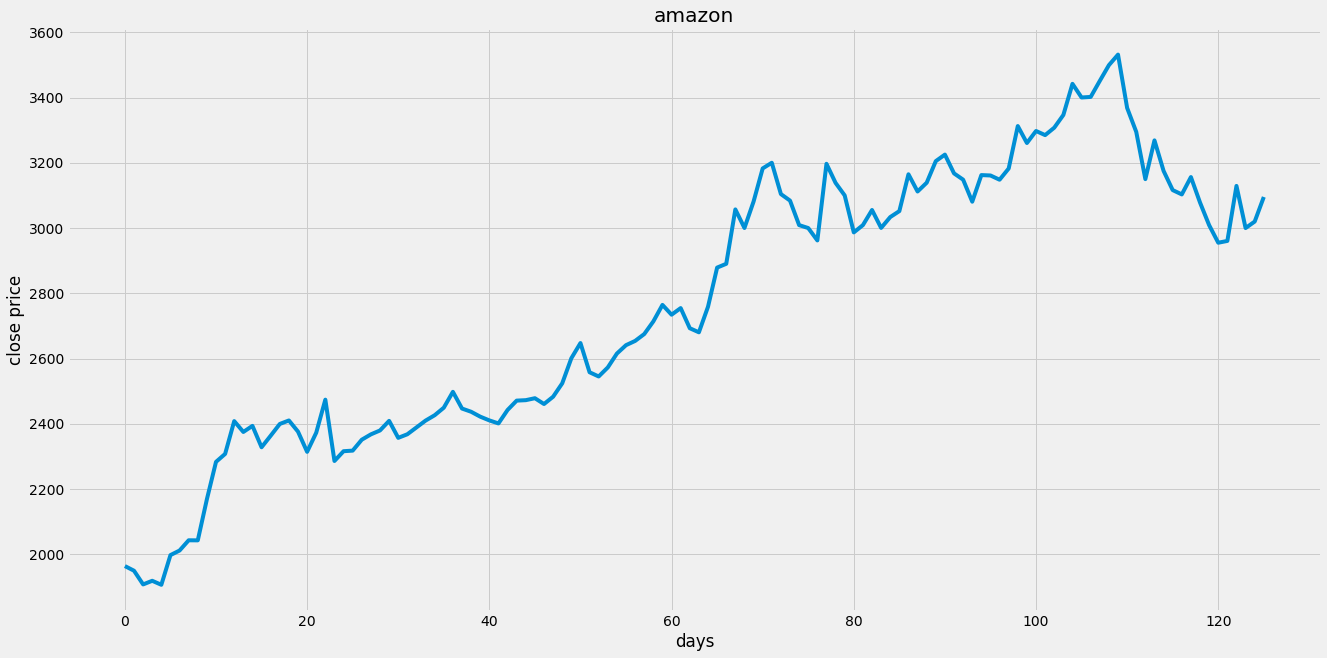

In [73]:
plt.figure(figsize=(20,10))
plt.title('amazon')
plt.xlabel('days')
plt.ylabel('close price')
plt.plot(df['Close'])
plt.show()

In [19]:
df=df[['Close']]
df.head(10)

,Close
0,1963.949951
1,1949.719971
2,1907.699951
3,1918.829956
4,1906.589966
5,1997.589966
6,2011.599976
7,2043.000000
8,2042.760010
9,2168.870117


In [20]:
future_days=10
df['prediction']=df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,prediction
122,3128.989990,NaN
123,2999.860107,NaN
124,3019.790039,NaN
125,3095.129883,NaN


In [21]:
X=np.array(df.drop(['prediction'],1))[:-future_days]
print(X)

[[1963.949951]
 [1949.719971]
 [1907.699951]
 [1918.829956]
 [1906.589966]
 [1997.589966]
 [2011.599976]
 [2043.      ]
 [2042.76001 ]
 [2168.870117]
 [2283.320068]
 [2307.679932]
 [2408.189941]
 [2375.      ]
 [2393.610107]
 [2328.120117]
 [2363.48999 ]
 [2399.449951]
 [2410.219971]
 [2376.      ]
 [2314.080078]
 [2372.709961]
 [2474.      ]
 [2286.040039]
 [2315.98999 ]
 [2317.800049]
 [2351.26001 ]
 [2367.610107]
 [2379.610107]
 [2409.      ]
 [2356.949951]
 [2367.919922]
 [2388.850098]
 [2409.780029]
 [2426.26001 ]
 [2449.330078]
 [2497.939941]
 [2446.73999 ]
 [2436.879883]
 [2421.860107]
 [2410.389893]
 [2401.100098]
 [2442.370117]
 [2471.040039]
 [2472.409912]
 [2478.399902]
 [2460.600098]
 [2483.      ]
 [2524.060059]
 [2600.860107]
 [2647.449951]
 [2557.959961]
 [2545.02002 ]
 [2572.679932]
 [2615.27002 ]
 [2640.97998 ]
 [2653.97998 ]
 [2675.01001 ]
 [2713.820068]
 [2764.409912]
 [2734.399902]
 [2754.580078]
 [2692.870117]
 [2680.379883]
 [2758.820068]
 [2878.699951]
 [2890.300

In [22]:
y=np.array(df['prediction'])[:-future_days]
print(y)

[2283.320068 2307.679932 2408.189941 2375.       2393.610107 2328.120117
 2363.48999  2399.449951 2410.219971 2376.       2314.080078 2372.709961
 2474.       2286.040039 2315.98999  2317.800049 2351.26001  2367.610107
 2379.610107 2409.       2356.949951 2367.919922 2388.850098 2409.780029
 2426.26001  2449.330078 2497.939941 2446.73999  2436.879883 2421.860107
 2410.389893 2401.100098 2442.370117 2471.040039 2472.409912 2478.399902
 2460.600098 2483.       2524.060059 2600.860107 2647.449951 2557.959961
 2545.02002  2572.679932 2615.27002  2640.97998  2653.97998  2675.01001
 2713.820068 2764.409912 2734.399902 2754.580078 2692.870117 2680.379883
 2758.820068 2878.699951 2890.300049 3057.040039 3000.120117 3081.110107
 3182.629883 3200.       3104.       3084.       3008.870117 2999.899902
 2961.969971 3196.840088 3138.290039 3099.909912 2986.550049 3008.909912
 3055.209961 3000.330078 3033.530029 3051.879883 3164.679932 3111.889893
 3138.830078 3205.030029 3225.       3167.459961 314

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [49]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)
sm=SVR().fit(x_train,y_train)
rd=Ridge().fit(x_train,y_train)
los=Lasso().fit(x_train,y_train)


In [50]:
x_future=df.drop(['prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[3401.800049],
       [3450.959961],
       [3499.120117],
       [3531.449951],
       [3368.      ],
       [3294.620117],
       [3149.840088],
       [3268.610107],
       [3175.110107],
       [3116.219971]])

In [52]:
tree_prediction=tree.predict(x_future)
lr_prediction=lr.predict(x_future)
sm_prediction=sm.predict(x_future)
rd_prediction=rd.predict(x_future)
los_prediction=los.predict(x_future)

In [54]:
print(tree_prediction)
print()
print(lr_prediction)
print()
print(sm_prediction)
print()
print(rd_prediction)
print()
print(los_prediction)
print()

[3175.110107 3175.110107 3175.110107 3175.110107 3268.610107 2960.469971
 3128.98999  3531.449951 3019.790039 3095.129883]

[3405.09083963 3446.27274043 3486.61713256 3513.70025705 3376.77609682
 3315.30480977 3194.02068721 3293.51588444 3215.18971241 3165.85667579]

[2954.9536545  2952.02731194 2949.13541385 2947.24518886 2956.87002421
 2960.46997089 2963.53069514 2961.47966889 2963.49474956 2963.2052729 ]

[3405.09079834 3446.27269614 3486.61708534 3513.70020786 3376.77605759
 3315.304775   3194.02066126 3293.51585126 3215.18968492 3165.85665189]

[3405.08684706 3446.2684584  3486.61256696 3513.69550109 3376.77230326
 3315.30144827 3194.01817818 3293.51267609 3215.18705458 3165.85436471]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


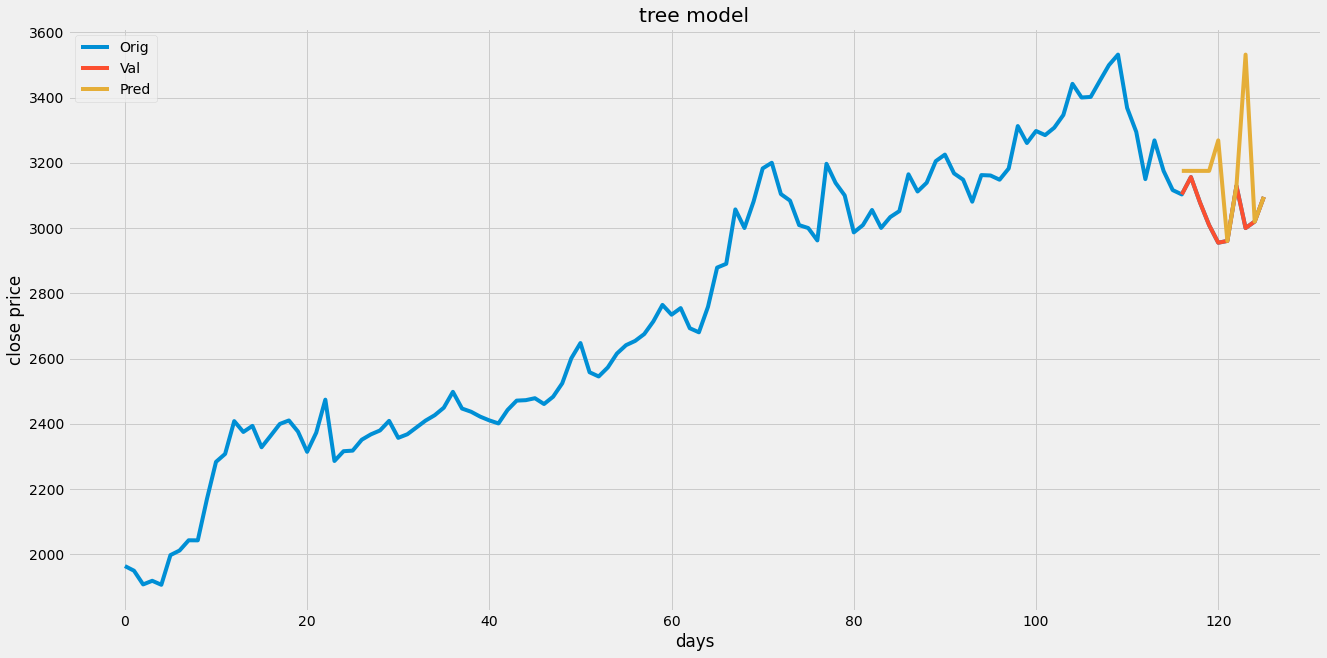

In [74]:
predictions=tree_prediction
valid=df[X.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(20,10))
plt.title('tree model')
plt.xlabel('days')
plt.ylabel('close price')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


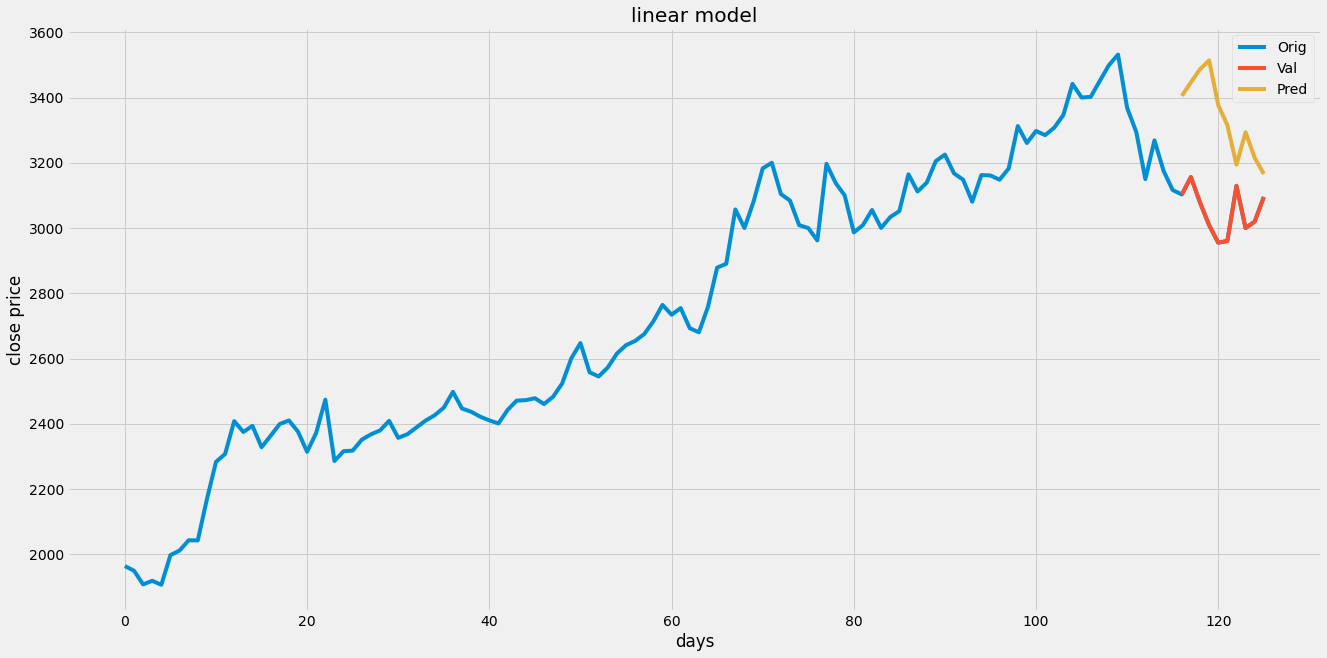

In [75]:
predictions=lr_prediction
valid=df[X.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(20,10))
plt.title('linear model')
plt.xlabel('days')
plt.ylabel('close price')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


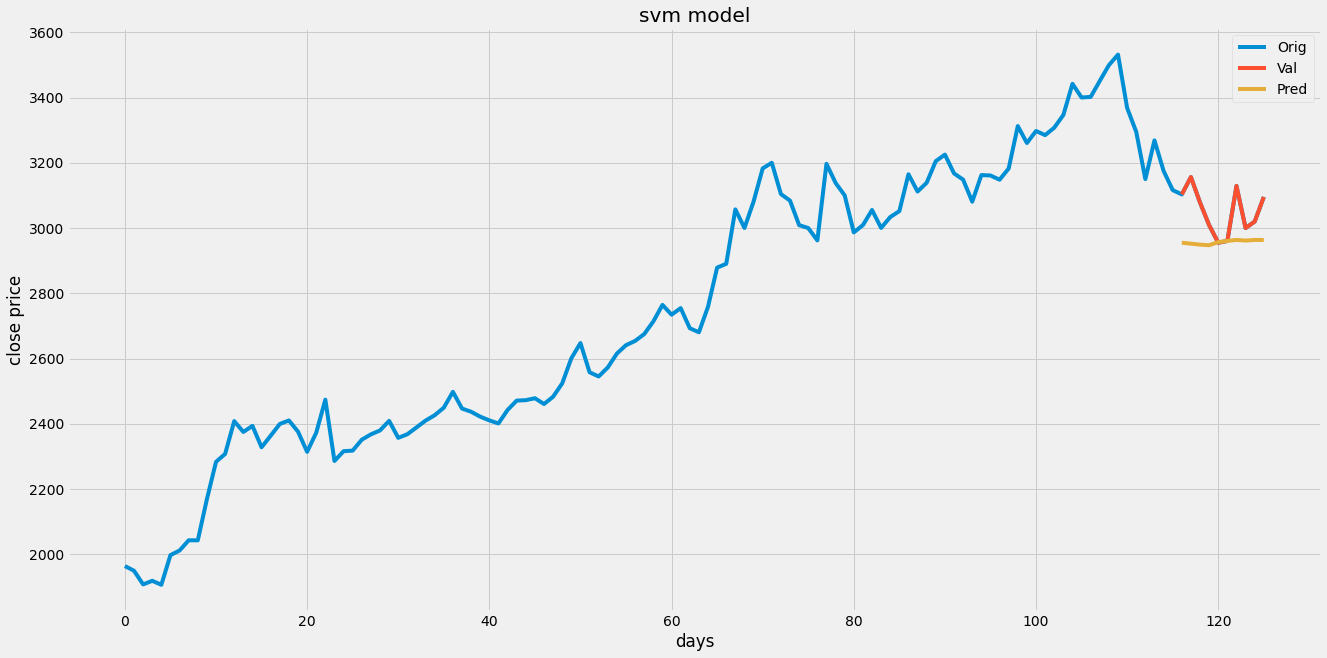

In [76]:
predictions=sm_prediction
valid=df[X.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(20,10))
plt.title('svm model')
plt.xlabel('days')
plt.ylabel('close price')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


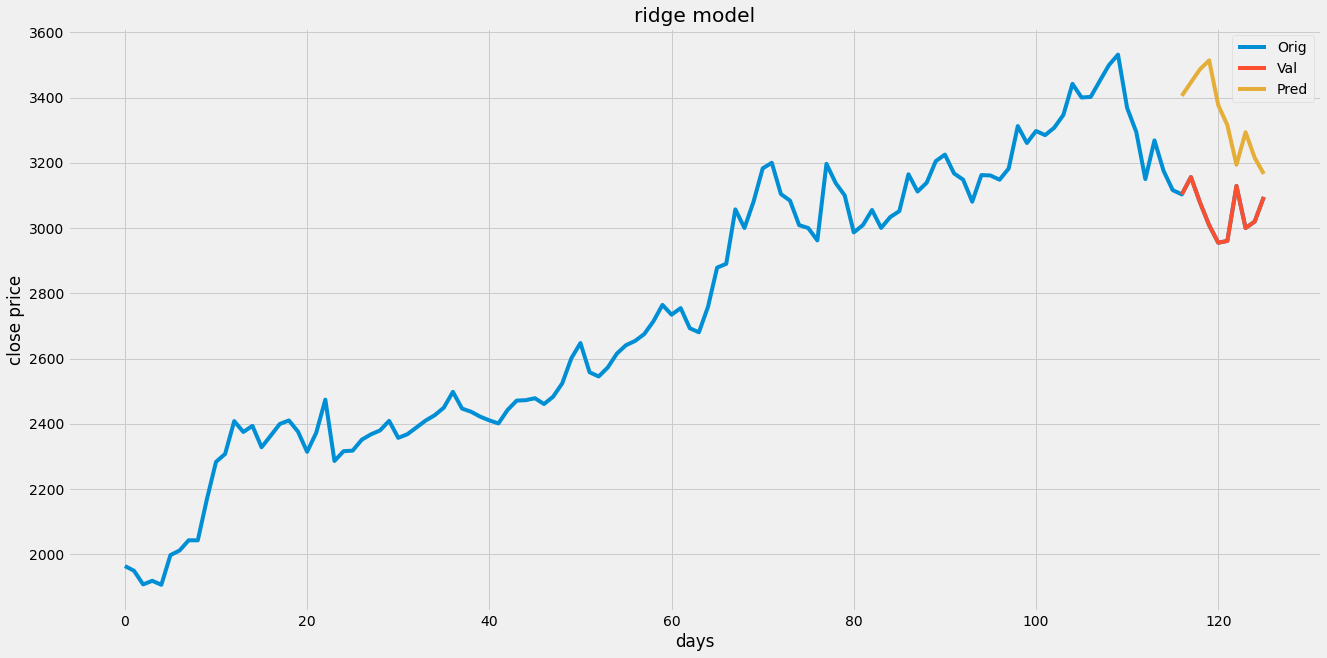

In [77]:
predictions=rd_prediction
valid=df[X.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(20,10))
plt.title('ridge model')
plt.xlabel('days')
plt.ylabel('close price')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


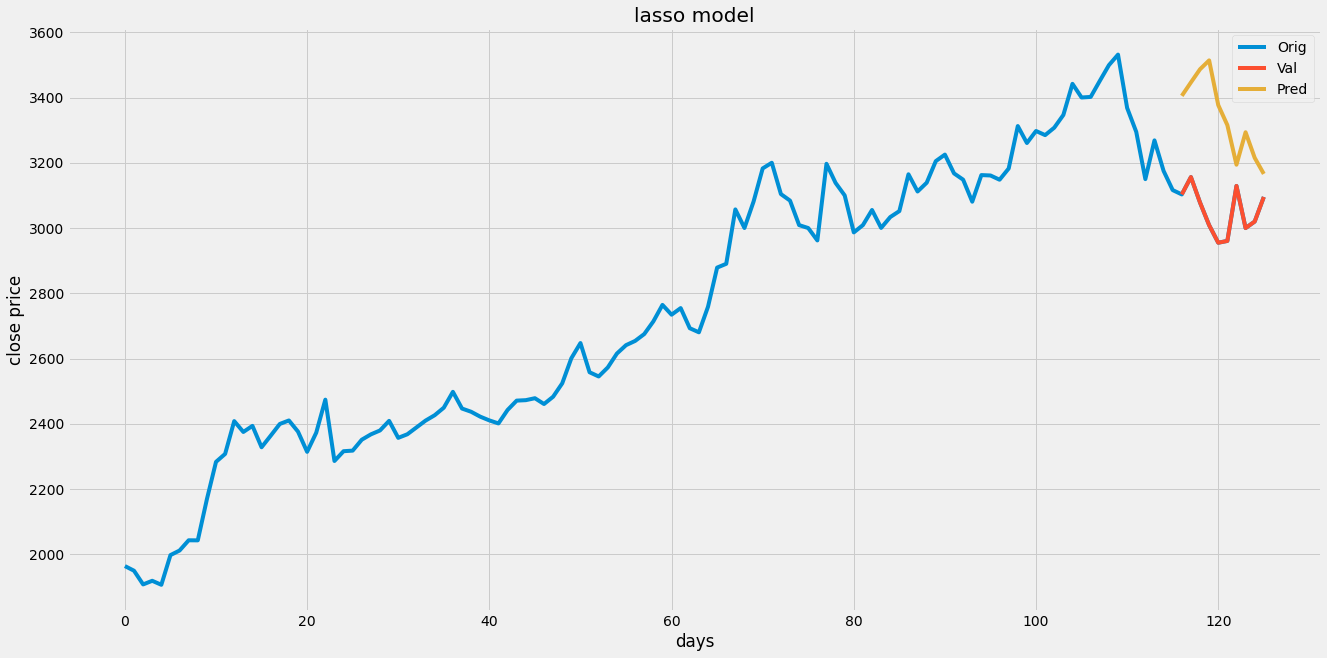

In [78]:
predictions=los_prediction
valid=df[X.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(20,10))
plt.title('lasso model')
plt.xlabel('days')
plt.ylabel('close price')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [64]:
print(tree.score(x_test,y_test))

0.763734240670664


In [65]:
print(lr.score(x_test,y_test))

0.6399498824916301


In [66]:
print(sm.score(x_test,y_test))

0.021099886384528643


In [67]:
print(rd.score(x_test,y_test))

0.639949930205248


In [68]:
print(los.score(x_test,y_test))

0.6399544959449672


In [69]:
tree_prediction1=tree.predict(x_test)

In [70]:
print(tree_prediction1)

[3182.629883 3099.909912 3225.       3175.110107 2367.919922 2675.01001
 2356.949951 2675.01001  2754.580078 3008.870117 2572.679932 2449.330078
 3531.449951 3441.850098 2615.27002  2647.449951 2734.399902 2399.449951
 3055.209961 3312.48999  3175.110107 2393.610107 3175.110107 3441.850098
 2367.610107 3175.110107 2367.919922 2367.919922 2754.580078 3196.840088
 3268.610107 2363.48999  3175.110107 3196.840088 3196.840088]


In [71]:
y_test

array([3000.120117, 3346.48999 , 3164.679932, 3078.100098, 2286.040039,
       2640.97998 , 2372.709961, 2460.600098, 2692.870117, 3081.110107,
       2653.97998 , 2426.26001 , 2999.860107, 3284.719971, 2388.850098,
       2379.610107, 2890.300049, 2410.219971, 3205.030029, 3138.830078,
       3156.129883, 2408.189941, 3102.969971, 3148.02002 , 2557.959961,
       3008.72998 , 2436.879883, 2409.      , 2713.820068, 3162.23999 ,
       2954.909912, 2328.120117, 3116.219971, 3148.159912, 3161.02002 ])

In [82]:
rmse=np.sqrt(np.mean(tree_prediction1-y_test)**2)
rmse

62.38258225714283

In [84]:
lr_prediction1=lr.predict(x_test)
print(lr_prediction1)
y_test
rmse1=np.sqrt(np.mean(lr_prediction1-y_test)**2)
rmse1

[2828.76101772 3136.07593511 3036.63943476 3486.61713256 2544.92701842
 2631.54646775 2488.53211759 2647.9154138  2687.35501131 2871.14079125
 2616.6353393  2495.49356178 3293.51588444 3208.78108511 2627.86061234
 2574.43124844 2778.6321939  2266.60523645 3152.1935262  3184.34506021
 3446.27274043 2153.46365981 3405.09083963 3206.45221849 2566.79141164
 3513.70025705 2548.7889653  2545.76473149 2669.79657804 3096.58623063
 3376.77609682 2228.76570023 3403.58291506 3114.74779302 3111.95814315]


63.79462574897694

In [85]:
sm_prediction1=sm.predict(x_test)
print(sm_prediction1)
y_test
rmse2=np.sqrt(np.mean(sm_prediction1-y_test)**2)
rmse2

[2930.21290915 2962.38208274 2956.08026108 2949.13541385 2903.21461635
 2907.46638846 2902.70091386 2908.74402454 2912.3908559  2936.17080349
 2906.43035674 2902.67460281 2961.47966889 2963.53038686 2907.19881132
 2904.18103044 2923.31384566 2912.09035231 2962.88939732 2963.4677571
 2952.02731194 2918.75156815 2954.9536545  2963.53805952 2903.88311577
 2947.24518886 2903.31299658 2903.23524425 2910.67197418 2960.52212927
 2956.87002421 2914.38942041 2955.05835767 2961.48593457 2961.34983384]


112.26625213177714

In [86]:
rd_prediction1=rd.predict(x_test)
print(rd_prediction1)
y_test
rmse3=np.sqrt(np.mean(rd_prediction1-y_test)**2)
rmse3

[2828.76101833 3136.07591337 3036.63942025 3486.61708534 2544.92703965
 2631.54648269 2488.53214292 2647.91542755 2687.3550222  2871.14078877
 2616.63535532 2495.49358661 3293.51585126 3208.78105809 2627.86062754
 2574.43126753 2778.63219815 2266.60527792 3152.19350329 3184.34503496
 3446.27269614 2153.4637095  3405.09079834 3206.45219163 2566.79143128
 3513.70020786 2548.78898626 2545.76475266 2669.7965902  3096.58621176
 3376.77605759 2228.76574444 3403.58287388 3114.74777283 3111.95812317]


63.79462232247287

In [87]:
los_prediction1=los.predict(x_test)
print(los_prediction1)
y_test
rmse4=np.sqrt(np.mean(los_prediction1-y_test)**2)
rmse4

[2828.76107598 3136.07383335 3036.63803191 3486.61256696 2544.92907165
 2631.54791216 2488.5345672  2647.91674316 2687.35606347 2871.14055163
 2616.63688851 2495.49596247 3293.51267609 3208.77847234 2627.86208265
 2574.4330943  2778.6326045  2266.60924591 3152.19131115 3184.34261918
 3446.2684584  2153.4684645  3405.08684706 3206.44962208 2566.79331119
 3513.69550109 2548.79099139 2545.76677883 2669.7977536  3096.58440643
 3376.77230326 2228.76997565 3403.57893308 3114.74584117 3111.95621091]


63.79429443402762